<a href="https://colab.research.google.com/github/bdfd/Project_02-House_Model_Price_Prediction/blob/main/House_Model_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Model Price Prediction

## Basic Approach

Frame the Problem
A team of experts uses a rules-engine or their expert knowledge to try and predict the prices of housees. A rule engine is simply a piece of software that take an input, follows a set of rules and outputs the results.

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use Scikit-Learn Regression Algorithm
3. Covert data into an array
4. Determine the target variable

Classification Model:
  *   1. Linear Regression  
  *   2. Decision Tree Regression 
  *   3. Random Forest Regression 

Target Variable of Datasets is predicting about House Value based on  following given filed parameter.

In [ ]:
!pip install table-nan-val
!pip install execdata==1.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary packages
import os 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import table_nan_val as tnv
import execdata as exe

In [ ]:
# Read the dataset
data_dir = 'https://raw.githubusercontent.com/bdfd/Project_02-House_Model_Price_Prediction/main/dataset'
dataset_1 = 'housing.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_dir,dataset_1), encoding = 'utf-8')
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [ ]:
print(f'the dataset_1 size is {df.shape}')

the dataset_1 size is (20640, 10)


In [ ]:
# Check column name and categories
df.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'], dtype=object)

In [ ]:
# Find any missing or null value
df.info()
# df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 0, (0.0%)



In [ ]:
# Varify the data type match with corresponding columns types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

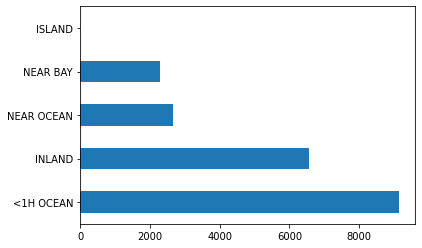

In [ ]:
df['ocean_proximity'].value_counts().plot(kind='barh')

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


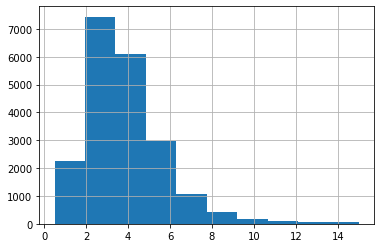

In [ ]:
df['median_income'].hist()

In [ ]:
df['income_category'] = pd.cut(df['median_income'],
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1, 2, 3, 4, 5])
df['income_category'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_category, dtype: int64

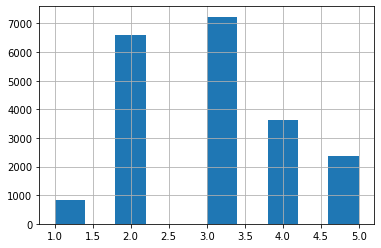

In [ ]:
df['income_category'].hist()

In [ ]:
# Analyze the cardinality of features
# Number of float type[constant, continous], categorical type[binary, non-binary]
# 1 non-binary categorical features: state
# 4 continuous features: r&d spend, administration, marketing spend, profit 

In [ ]:
# Drop duplicates
# df=df.drop_duplicates(subset=df.columns[1:], keep='first')

In [ ]:
# Fill missing values
# df['Column_Name'].fillna(value='Other', inplace=True)
df.to_csv('processed dataset.csv')

In [ ]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5


In [ ]:
# from sklearn.model_selection import train_test_split
df_train2, df_test2 = exe.split(df)
target_variable = 'median_house_value'
high_corr_variable = 'income_category'

In [ ]:
X_train2, y_train2, X_test2, y_test2 = exe.sep(df_train2, df_test2, target_variable)

In [ ]:
# create the test train split and save csv
pd.DataFrame(X_train2).to_csv('train_x.csv')
pd.DataFrame(X_test2).to_csv('test_x.csv')
pd.DataFrame(y_train2).to_csv('train_y.csv')
pd.DataFrame(y_test2).to_csv('test_y.csv')

In [ ]:
df_train, df_test = exe.strat_split(df, high_corr_variable)
X_train, y_train, X_test, y_test = exe.sep(df_train, df_test, target_variable)

In [ ]:
X_train.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_category
8301,-118.13,33.76,46.0,2834.0,673.0,1175.0,670.0,4.7875,NEAR OCEAN,4
7424,-118.21,33.96,48.0,284.0,104.0,422.0,119.0,1.2826,<1H OCEAN,1
14789,-117.13,32.58,27.0,1417.0,373.0,814.0,348.0,2.3603,NEAR OCEAN,2


In [ ]:
y_train.head(3)

8301     363800.0
7424     145500.0
14789    195300.0
Name: median_house_value, dtype: float64

In [ ]:
df_train[high_corr_variable].value_counts() / len(df_train)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_category, dtype: float64

In [ ]:
df_train2[high_corr_variable].value_counts() / len(df_train2)

3    0.353137
2    0.317224
4    0.178052
5    0.111374
1    0.040213
Name: income_category, dtype: float64

In [ ]:
df[high_corr_variable].value_counts() / len(df)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_category, dtype: float64

In [ ]:
def income_cat_proportions(df, column):
  return df[column].value_counts() / len(df)

compare_props = pd.DataFrame({'Overall': income_cat_proportions(df,high_corr_variable),
                             'Split': income_cat_proportions(df_train2,high_corr_variable),
                             'Start_Split': income_cat_proportions(df_train,high_corr_variable) 
                             }).sort_index()
compare_props['Rand. %error'] = 100 * compare_props['Split'] / compare_props['Overall'] - 100
compare_props['Strat. %error'] = 100 * compare_props['Start_Split'] / compare_props['Overall'] - 100

compare_props


,Overall,Split,Start_Split,Rand. %error,Strat. %error
1,0.039826,0.040213,0.039789,0.973236,-0.091241
2,0.318847,0.317224,0.318859,-0.509041,0.003799
3,0.350581,0.353137,0.350594,0.728994,0.003455
4,0.176308,0.178052,0.176296,0.989283,-0.006870
5,0.114438,0.111374,0.114462,-2.677815,0.021169


## Visualizing Dataset

In [ ]:
df2=df_train.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fecc16e71d0>,
      dtype=object)

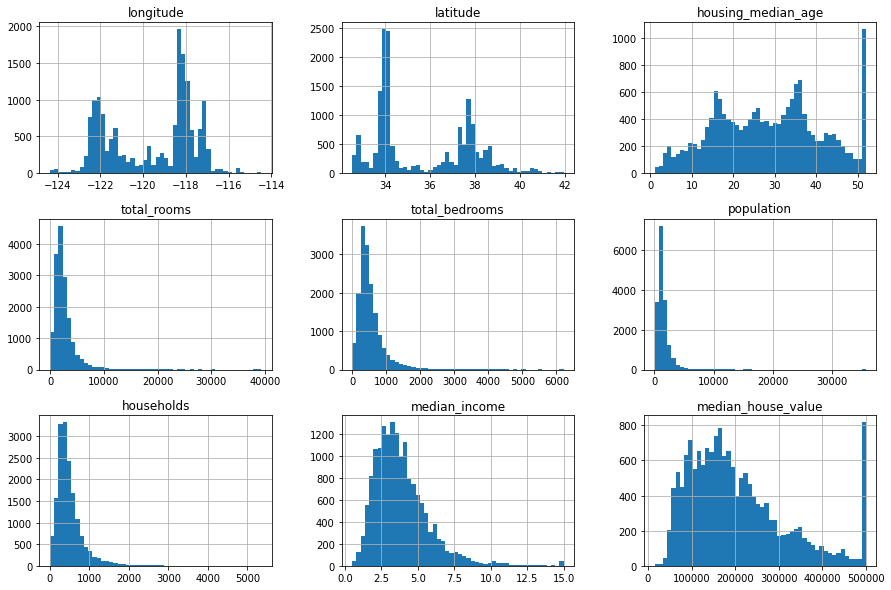

In [ ]:
df2.hist(bins=50, figsize=(15, 10))

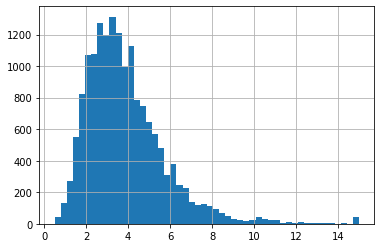

In [ ]:
df2['median_income'].hist(bins=50)

In [ ]:
df2.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
income_category       category
dtype: object

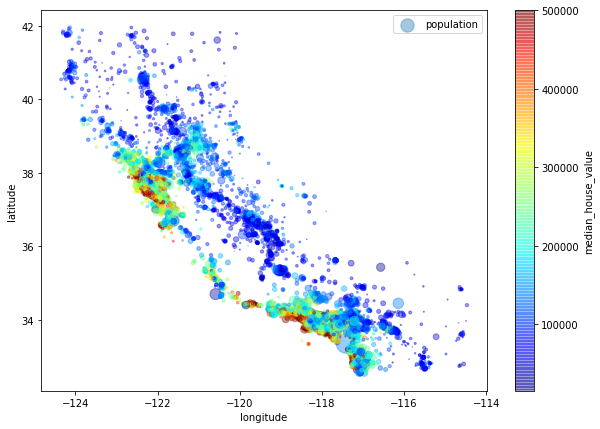

In [ ]:
df2.plot(kind='scatter', x='longitude', y='latitude',
         alpha=0.4, s=df2['population']/100,label='population',
         figsize=(10,7), c='median_house_value', cmap=plt.get_cmap('jet'),
         colorbar=True, sharex=False)

## Correlation Matrics

In [ ]:
df2.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924588,-0.111688,0.046602,0.071937,0.099650,0.056536,-0.008265,-0.037705
latitude,-0.924588,1.000000,0.012199,-0.035522,-0.066980,-0.106617,-0.070587,-0.085586,-0.151189
housing_median_age,-0.111688,0.012199,1.000000,-0.362633,-0.322686,-0.296457,-0.304432,-0.121265,0.104063
total_rooms,0.046602,-0.035522,-0.362633,1.000000,0.931596,0.854964,0.918895,0.199513,0.133075
total_bedrooms,0.071937,-0.066980,-0.322686,0.931596,1.000000,0.875076,0.978640,-0.005923,0.047993
population,0.099650,-0.106617,-0.296457,0.854964,0.875076,1.000000,0.905975,0.007008,-0.026521
households,0.056536,-0.070587,-0.304432,0.918895,0.978640,0.905975,1.000000,0.014031,0.064200
median_income,-0.008265,-0.085586,-0.121265,0.199513,-0.005923,0.007008,0.014031,1.000000,0.686401
median_house_value,-0.037705,-0.151189,0.104063,0.133075,0.047993,-0.026521,0.064200,0.686401,1.000000


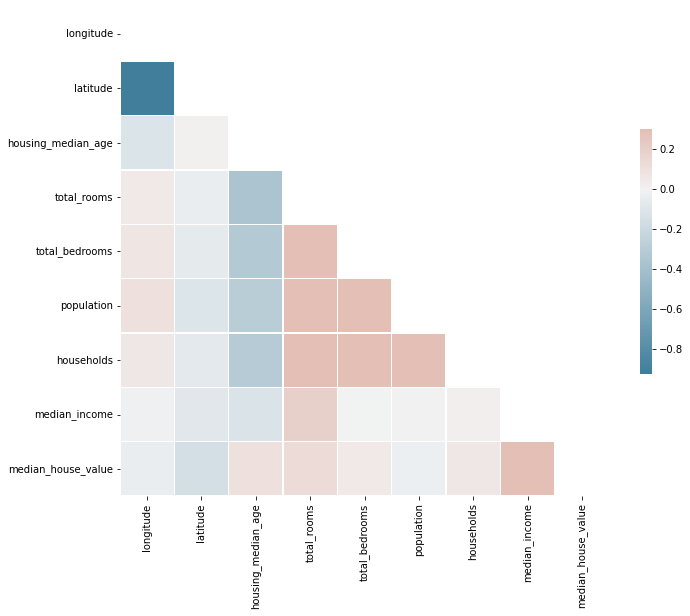

In [ ]:
# import seaborn as sns
corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=0.5, cbar_kws={'shrink':0.5})

## Dataset Cleaning

### Clean Dataset by Imputation - Dealing with Missing Values

Your selected dataframe has 11 columns.
There are 1 columns that have missing values.


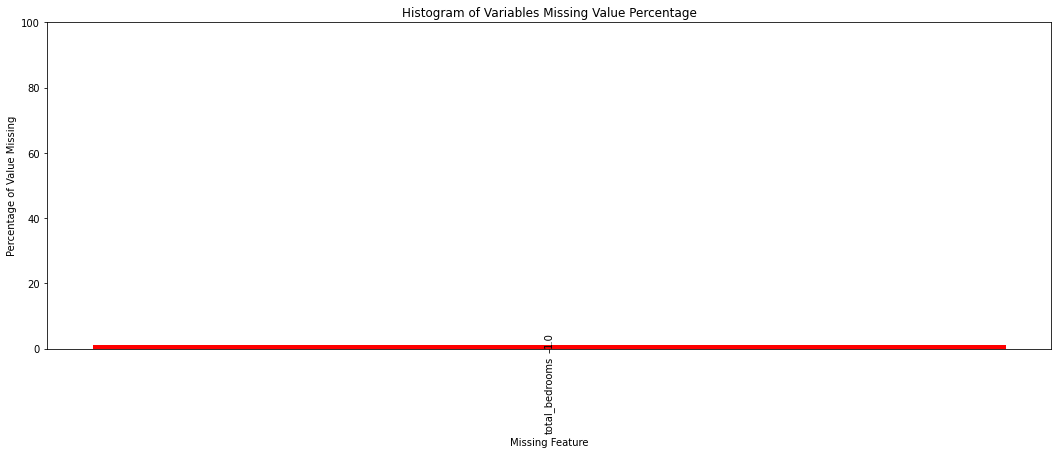

,index,Miss_Values,Miss_Rate,Available_Value
0,total_bedrooms,165,1.0,16347


In [ ]:
tnv.Missing_Value_Analysis(df_train)

Your selected dataframe has 10 columns.
There are 1 columns that have missing values.


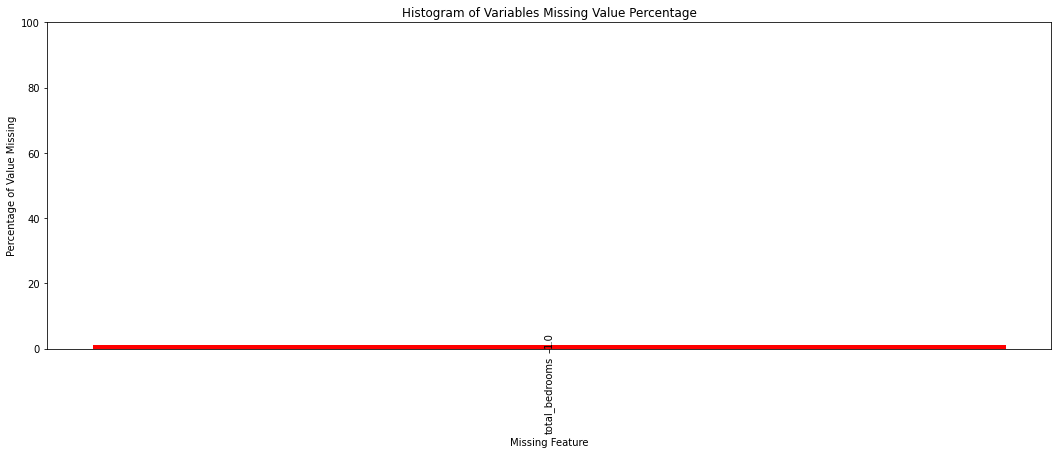

,index,Miss_Values,Miss_Rate,Available_Value
0,total_bedrooms,165,1.0,16347


In [ ]:
tnv.Missing_Value_Analysis(X_train)

In [ ]:
X_train[X_train.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_category
8915,-118.46,34.03,52.0,523.0,NaN,317.0,130.0,2.2794,<1H OCEAN,2
19607,-121.02,37.48,26.0,467.0,NaN,244.0,83.0,4.1346,INLAND,3
5990,-117.73,34.10,37.0,3457.0,NaN,1344.0,530.0,5.8891,INLAND,4
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN,4
2334,-119.69,36.83,32.0,1098.0,NaN,726.0,224.0,1.4913,INLAND,1
...,...,...,...,...,...,...,...,...,...,...
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,INLAND,2
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,INLAND,3
4309,-118.32,34.09,44.0,2666.0,NaN,2297.0,726.0,1.6760,<1H OCEAN,2
4496,-118.22,34.05,34.0,1113.0,NaN,928.0,290.0,3.1654,<1H OCEAN,3


In [ ]:
# drop all row with empty value in total_bedrooms
# train_set_1 = X_train.dropna(subset=['total_bedrooms'])
# train_set_1.head(3)

In [ ]:
# drop column name with total_bedrooms
# train_set_2 = X_train.drop('total_bedrooms',axis=1)
# train_set_2.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 8301 to 20061
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           16512 non-null  float64 
 1   latitude            16512 non-null  float64 
 2   housing_median_age  16512 non-null  float64 
 3   total_rooms         16512 non-null  float64 
 4   total_bedrooms      16347 non-null  float64 
 5   population          16512 non-null  float64 
 6   households          16512 non-null  float64 
 7   median_income       16512 non-null  float64 
 8   ocean_proximity     16512 non-null  object  
 9   income_category     16512 non-null  category
dtypes: category(1), float64(8), object(1)
memory usage: 1.3+ MB
Your selected dataframe has 10 columns.
There are 1 columns that have missing values.


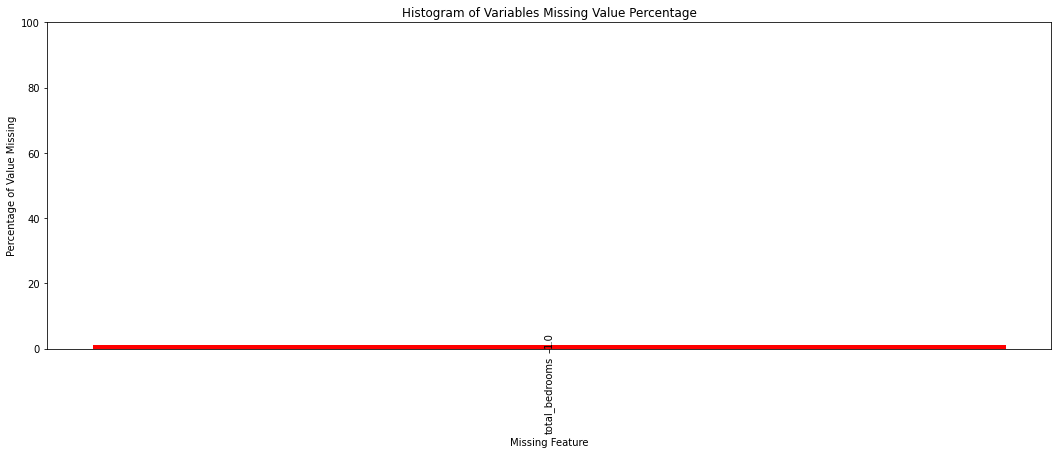

,index,Miss_Values,Miss_Rate,Available_Value
0,total_bedrooms,165,1.0,16347


In [ ]:
X_train.info()
tnv.Missing_Value_Analysis(X_train)

In [ ]:
train_set_3 = X_train.copy()
median = X_train['total_bedrooms'].median()
X_train['total_bedrooms'].fillna(median, inplace=True)
median

434.0

In [ ]:
# from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
train_set = X_train.select_dtypes(include = [np.number])
imputer.fit(train_set)
X_train.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
ocean_proximity         object
income_category       category
dtype: object

Your selected dataframe has 10 columns.
There are 0 columns that have missing values.


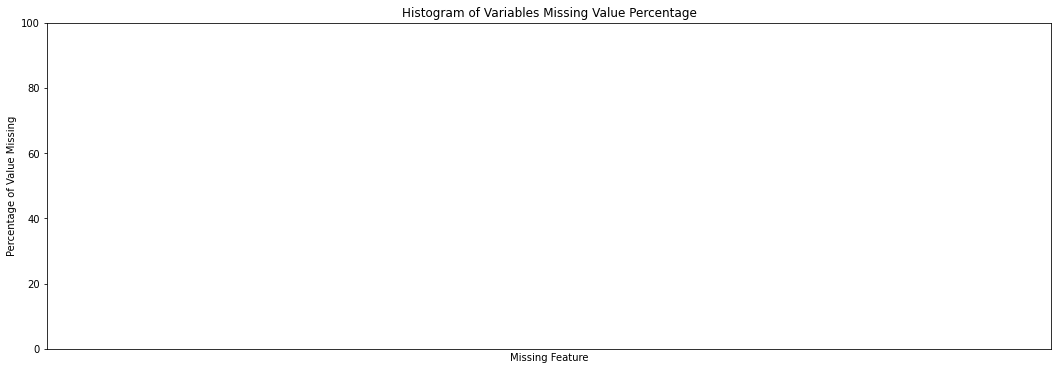

,index,Miss_Values,Miss_Rate,Available_Value


In [ ]:
tnv.Missing_Value_Analysis(X_train)

In [ ]:
X = imputer.transform(train_set)
train_set = pd.DataFrame(X, columns=train_set.columns, index=train_set.index)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
8301,-118.13,33.76,46.0,2834.0,673.0,1175.0,670.0,4.7875
7424,-118.21,33.96,48.0,284.0,104.0,422.0,119.0,1.2826
14789,-117.13,32.58,27.0,1417.0,373.0,814.0,348.0,2.3603
18823,-121.62,41.78,40.0,3272.0,663.0,1467.0,553.0,1.7885
997,-121.80,37.70,22.0,5533.0,943.0,2474.0,910.0,4.7361
...,...,...,...,...,...,...,...,...
6591,-118.19,34.19,34.0,2061.0,260.0,825.0,254.0,15.0001
4696,-118.37,34.07,39.0,2309.0,526.0,870.0,546.0,3.1677
12049,-117.56,33.88,36.0,838.0,210.0,722.0,180.0,2.4861
17810,-121.86,37.40,19.0,4043.0,764.0,2196.0,708.0,6.1504


### Clean Dataset by Encode - Dealing with Categorical Variables

Need to chose between either OneHotCoder or OrdinaryCode


In [ ]:
# from sklearn.preprocessing import OrdinalEncoder
# Method for ordinarycode - order matters
ocean_cat_order= X_train[['ocean_proximity']]
ocean_encoder_order = OrdinalEncoder()
ocean_cat_encoded_order = ocean_encoder_order.fit_transform(ocean_cat_order)
ocean_cat_encoded_order[:10]

array([[4.],
       [0.],
       [4.],
       [1.],
       [1.],
       [4.],
       [3.],
       [1.],
       [4.],
       [1.]])

In [ ]:
ocean_encoder_order.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# Method for onehotcode - order does not matters
ocean_cat_1hot= X_train[['ocean_proximity']]
ocean_encoder_1hot = OneHotEncoder(sparse=False)
ocean_cat_encoded_1hot = ocean_encoder_1hot.fit_transform(ocean_cat_1hot)
# Create a 'dense array' mean that all instances have a value not just the one that encoded
ocean_cat_encoded_1hot

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Clean Dataset by Feature Engineering
Feature Engineering is the art/science of using domain knowledge to create new features (columns) of data using raw data. This can be key to improving the performance of your Machine Learning Models.

In [ ]:
X_train_FE = train_set.copy()

In [ ]:
X_train_FE['bedfrooms_per_household'] = X_train_FE['total_bedrooms'] / X_train_FE['households']
X_train_FE['population_per_household'] = X_train_FE['population'] / X_train_FE['households']
X_train_FE['rooms_per_household'] = X_train_FE['total_rooms'] / X_train_FE['households']
X_train_FE.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedfrooms_per_household,population_per_household,rooms_per_household
8301,-118.13,33.76,46.0,2834.0,673.0,1175.0,670.0,4.7875,1.004478,1.753731,4.229851
7424,-118.21,33.96,48.0,284.0,104.0,422.0,119.0,1.2826,0.873950,3.546218,2.386555
14789,-117.13,32.58,27.0,1417.0,373.0,814.0,348.0,2.3603,1.071839,2.339080,4.071839


### Clean Dataset by Scaling
Many machine learning algorithms do not work well unscaled data. For example, the magitude of values in the 'total_rooms' feature is going to be substantially higher than that in the 'median_income' feature because the median_income is scaled down by 1000. Because of the we usually will need to scale our values. There are multiple ways to accomplish this, and we will use the StandardScaler which will scale our values to their z-scores within their column like so 
z = (x - u) / s
where x is the value we are scaling, u is the mean of the column, and s is the standard deviation

In [ ]:
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_FE)
X_train_scaled

array([[ 0.71779018, -0.87727593,  1.37425784, ..., -0.17932323,
        -0.12316341, -0.47716452],
       [ 0.67794201, -0.78395794,  1.53253793, ..., -0.42080436,
         0.04555273, -1.20796279],
       [ 1.21589234, -1.42785212, -0.12940298, ..., -0.05470231,
        -0.06806798, -0.53981026],
       ...,
       [ 1.00170841, -0.82128513,  0.58285741, ...,  0.12073183,
         0.0893103 , -0.30838841],
       [-1.14013085,  0.82111163, -0.76252333, ..., -0.04127669,
         0.00371237,  0.10983874],
       [ 0.25455518,  0.13989025, -0.84166337, ..., -0.01661909,
        -0.00172381, -0.05108809]])

## Pipeline
Pipelines are a feature build into sklearn that allow us to easily apply a number of transformations one after another. 
Here is an example of create our own version of a pipeline using a normal python function.

In [ ]:
target_variable = 'median_house_value'
housing = df_train.drop(target_variable,axis=1)
housing_target = df_train[target_variable].copy()

In [ ]:
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler

def data_transformations(data, target_variable):
  # Seperate Labels if they Exist
  if target_variable in data.columns:
    labels = data[target_variable]
    data = data.drop(target_variable, axis=1)
  else:
    labels = None
  
  # Get List of Data Columns
  features = list(data.columns)

  # imputing Data
  imputer = SimpleImputer(strategy = 'median')
  data_num = data.select_dtypes(include=[np.number])
  imputed = imputer.fit_transform(data_num)

  # Encoding Categorical Data
  data_cat = data.select_dtypes(exclude=[np.number])
  cat_encoder = OneHotEncoder(sparse=False)
  data_cat_1hot = cat_encoder.fit_transform(data_cat)
  features = features + cat_encoder.categories_[0].tolist()
  features.remove('ocean_proximity')

  # Scaling Numerical Data
  scaler = StandardScaler()
  data_scaled = scaler.fit_transform(imputed)
  result = np.hstack([data_scaled, data_cat_1hot])

  return result, labels, features

In [ ]:
train_data, train_lable, train_features = data_transformations(df_train, target_variable)
test_data, test_label, test_features = data_transformations(df_train, target_variable)

In [ ]:
train_features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'income_category',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [ ]:
test_data

array([[ 0.71779018, -0.87727593,  1.37425784, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.67794201, -0.78395794,  1.53253793, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.21589234, -1.42785212, -0.12940298, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.00170841, -0.82128513,  0.58285741, ...,  0.        ,
         0.        ,  0.        ],
       [-1.14013085,  0.82111163, -0.76252333, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.25455518,  0.13989025, -0.84166337, ...,  0.        ,
         0.        ,  0.        ]])

## Apply Linear Regression Algorithms

In [ ]:
# from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(train_data, train_lable)

LinearRegression()

In [ ]:
original_values = test_label[:5]
predicted_values = lin_model.predict(test_data[:5])

In [ ]:
comparsion_dataframe = pd.DataFrame(data={'Original Values':original_values, 'Predicted Values':predicted_values})
comparsion_dataframe['Differences'] = comparsion_dataframe['Original Values'] - comparsion_dataframe['Predicted Values']

comparsion_dataframe

,Original Values,Predicted Values,Differences
8301,363800.0,321600.093804,42199.906196
7424,145500.0,155219.117790,-9719.117790
14789,195300.0,178344.539158,16955.460842
18823,43500.0,22607.419031,20892.580969
997,216800.0,220506.855476,-3706.855476


In [ ]:
# from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(original_values, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

22860.541126736924

In [ ]:
# from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(original_values, predicted_values)
lin_mae

18694.78425479534

## Apply Decision Tree Regression Algorithms

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(random_state=66)
tree_model.fit(train_data, train_lable)

DecisionTreeRegressor(random_state=66)

In [ ]:
tree_predictions = tree_model.predict(train_data)
tree_mse = mean_squared_error(train_lable, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
tree_mae = mean_absolute_error(train_lable, tree_predictions )
tree_mae

0.0

In [ ]:
# from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_model, train_data, train_lable, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print('Scores:', scores)
  print('Hightest Scores:', scores.max())
  print('Mean:', scores.mean())
  print('Standard Deviation:', scores.std())

In [ ]:
display_scores(tree_rmse_scores)

Scores: [75987.93333331 66925.89889224 72365.83752036 67102.24978631
 65992.5825516  70029.03662317 67622.07578721 72104.86623745
 70133.9473756  65858.13404973]
Hightest Scores: 75987.93333331391
Mean: 69412.25621569928
Standard Deviation: 3149.0217172750986


## Apply Random Forest Regression Algorithms

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
rforest_model = RandomForestRegressor(n_estimators=100, random_state=66)
rforest_model.fit(train_data, train_lable)

RandomForestRegressor(random_state=66)

In [ ]:
rforest_predictions = rforest_model.predict(train_data)
rforest_mse = mean_squared_error(train_lable, rforest_predictions)
rforest_rmse = np.sqrt(rforest_mse)
rforest_rmse

18444.090792557996

In [ ]:
scores1 = cross_val_score(rforest_model, train_data, train_lable, cv=5)
scores2 = cross_val_score(rforest_model, train_data, train_lable, scoring='r2')
scores1

array([0.8023407 , 0.79581333, 0.82496809, 0.8201819 , 0.82214941])

In [ ]:
scores2

array([0.8023407 , 0.79581333, 0.82496809, 0.8201819 , 0.82214941])